In [ ]:
# This code snippet relies on having already processed your geospatial data into 
# A 3d numpy array with shape [n_rows, 2, n_timepoints]
# Where each row is a seperate data point/observation,
# The second dimension is arranged Longtude/Latitude (X,Y)
# and the the number of timepoints depends on the resolution of source data
# Most commonly n_timepoints = 1440 for each minute of the day.

##### Imports

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import imageio

%matplotlib inline 

In [2]:
# Simulate input data in time array

n_timepoints = 60 # Most likely to be multiple of 60, depending on resolution
n_samples = 1000
time_array = np.empty([n_samples, 2, n_timepoints])

r = 0.5
for t in range(0, n_timepoints):
    for i in range(0, n_samples):
        time_array[i,0,t] = r *  np.cos(t / n_timepoints * 2 * np.pi) + np.random.randn() / 10
        time_array[i,1,t] = r *  np.sin(t / n_timepoints * 2 * np.pi) + np.random.randn() / 10
        

##### Show simulated data with a scatterplot

In [3]:
# Set plot limits
xmin = -1
xmax = 1
ymin = -1
ymax = 1

C:\Users\tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


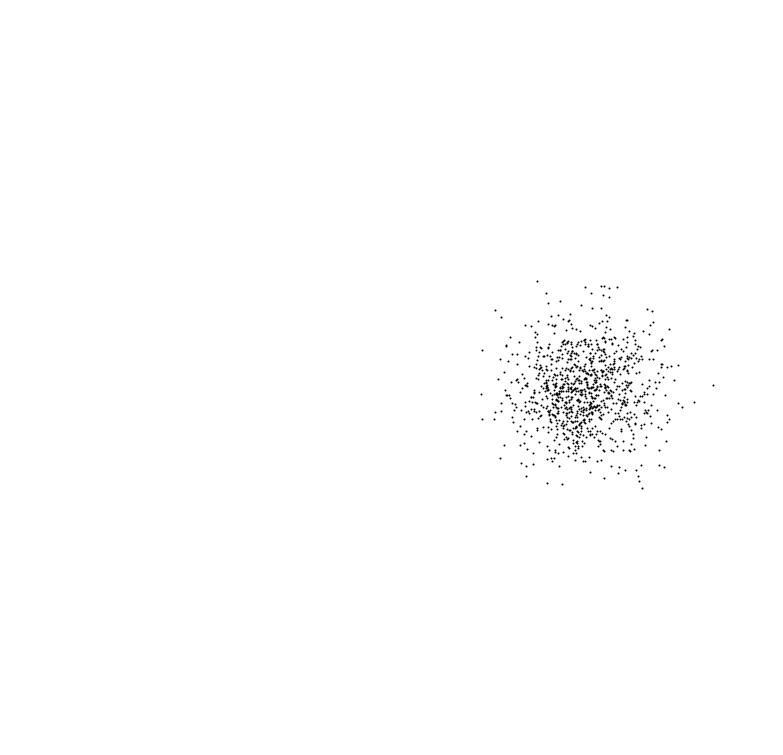

In [6]:
frames = []
fig = plt.figure(frameon=False)
fig.set_size_inches(10,10)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

export_path = 'export//scatter//'
if not os.path.exists(export_path):
    os.makedirs(export_path)
    
for t in range(0,n_timepoints):  
    ax.clear()
    ax.scatter(time_array[:,0,t],time_array[:,1,t],s=1,  alpha=1, c='black')#s=np.squeeze(time_array[:,2,t])*10, alpha=1, c='black')
    ax.axis('equal')
    plt.axis('off')
    ax.axis([xmin, xmax, ymin, ymax]) # Setting the axes like this avoid the zero values in the preallocated empty array.

    # Draw the figure
    fig.canvas.draw()

    # Convert to numpy array, and append to list
    np_fig = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    np_fig = np_fig.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(np_fig)
    
imageio.mimsave(export_path + '/scatter.gif', frames)

##### Create the hexin heatmap timeseries

In [ ]:
frames = []
num_bins = 100
fig = plt.figure(frameon=False) 
fig.set_size_inches(20,20)

export_path = 'export//hexbin//'
if not os.path.exists(export_path):
    os.makedirs(export_path)

# To make the content fill the whole figure
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()


for t in range(0,len(time_array[0,0,:])):  
	
	# Squeeze the current slice of the time array into vectors for x and y.
    x=np.copy(np.squeeze(time_array[:,0,t]))
    y=np.copy(np.squeeze(time_array[:,1,t]))


   # Remove the nans from the array
    x = x[~np.isnan(x)]
    y = y[~np.isnan(y)]

    # Log colormap
    
    hb = ax.hexbin(x, y, gridsize=num_bins, cmap='inferno', bins='log',
                   extent=(xmin, xmax, ymin, ymax))
    
    fig.add_axes(ax)
    ax.axis('equal')
    plt.axis('off')
    ax.axis([xmin, xmax, ymin, ymax]) 
    
    # Draw the figure
    fig.canvas.draw()

    # Convert to numpy array, and append to list
    np_fig = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    np_fig = np_fig.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(np_fig)
    
imageio.mimsave(export_path + '/hexbin_' + str(num_bins) + '_bins.gif', frames)
    

C:\Users\tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
C:\Users\tyler\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
